In [1]:
import numpy as np, json, matplotlib, pycm, pandas as pd, seaborn as sns
from datetime import datetime
from conceptual_engineering_assistant import Concept, Entity, ConceptualEngineeringAssistant
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain.document_loaders import WikipediaLoader

In [2]:
def confusion_matrix_for_eval_run(file):
    eval_run = json.load(open(file, 'r'))
    data = pd.DataFrame.from_records(eval_run["data"])
    return pycm.ConfusionMatrix(data["woman"].tolist(), data["classification"].tolist(), digit=2, classes=['true', 'false'])

In [10]:
def plot_confusion_matrix(cm,normalize=False, title='Confusion matrix', annot=False, cmap="YlGnBu"):
    if normalize == True:
        df = pd.DataFrame(cm.normalized_matrix).T.fillna(0)
    else:
        df = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df, annot=annot, cmap=cmap)
    ax.set_title(title)
    ax.set(xlabel='Predict', ylabel='Actual')

In [5]:
oed_cm = confusion_matrix_for_eval_run('./data/gpt-4_oed_woman_2023-08-14T11:37:28.388789.json')
haslanger_cm = confusion_matrix_for_eval_run('./data/gpt-4_haslanger_woman_2023-08-14T11:37:28.391962.json')
homosaurus_cm = confusion_matrix_for_eval_run('./data/gpt-4_homosaurus_woman_2023-08-14T11:37:28.392927.json')

In [6]:
print(f'Accuracy: {haslanger_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s pi: {haslanger_cm.PI:.2f}')

Accuracy: 0.90
Scott's pi: 0.78


In [8]:
haslanger_cm.CI("Overall ACC")

[0.021676600286945368, (0.8525138634375871, 0.937486136562413)]

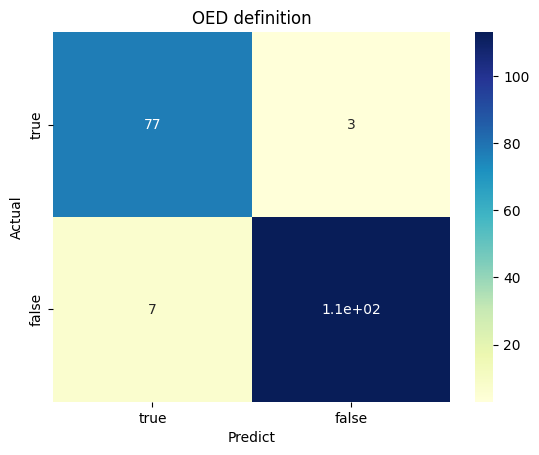

In [14]:
plot_confusion_matrix(oed_cm, title="OED definition", annot=True)

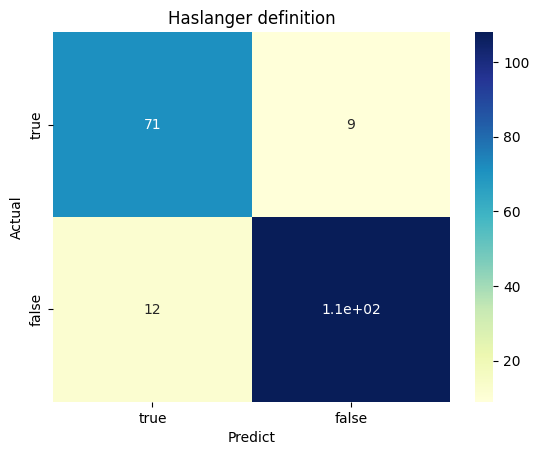

In [12]:
plot_confusion_matrix(haslanger_cm, title="Haslanger definition", annot=True)

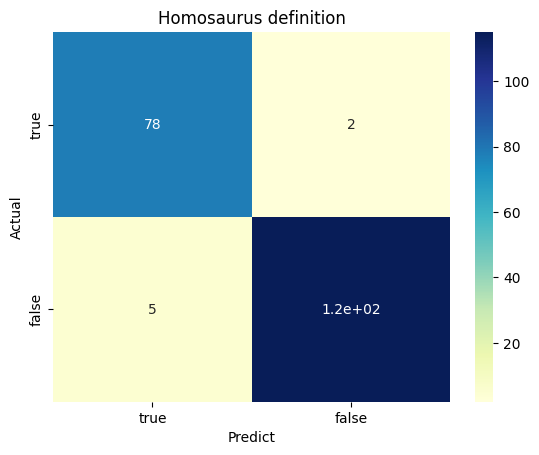

In [13]:
plot_confusion_matrix(homosaurus_cm, title="Homosaurus definition", annot=True)

In [16]:
print(pycm.Compare({"OED": oed_cm, "Haslanger": haslanger_cm, "Homosaurus": homosaurus_cm}))

Best : Homosaurus

Rank   Name          Class-Score       Overall-Score
1      Homosaurus    0.91667           0.95238
2      OED           0.88333           0.92381
3      Haslanger     0.76667           0.78095

